In [1]:
!pip install pandas matplotlib statsmodels pmdarima


Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/625.1 kB ? eta -:--:--
   --------------------------------------  624.6/625.1 kB 38.4 MB/s eta 0:00:01
   --------------------------------------  624.6/625.1 kB 38.4 MB/s eta 0:00:01
   --------------------------------------  624.6/625.1 kB 38.4 MB/s eta 0:00:01
   --------------------------------------  624.6/625.1 kB 38.4 MB/s eta 0:00:01
   --------------------------------------  624.6/625.1 kB 38.4 MB/s eta 0:00:01
   --------------------------------------  624.6/625.1 kB 38.4 MB/s eta 0:00:01
   ---------------------------------------- 625.1/625.1 kB 2.2 MB/s eta 0:00:00
   ---------------------------------------- 0.0/2.8 MB ? eta -:--:--
   ---------------------------------------  2.8/2.8 MB 173.4 MB/s eta 0:00:01
   ---------------------------------------  2.8/2.8 MB 173.4 MB/s eta 0:00:01
   ---------------------------------------  2.8/2.8 MB 173.4 MB/s 

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


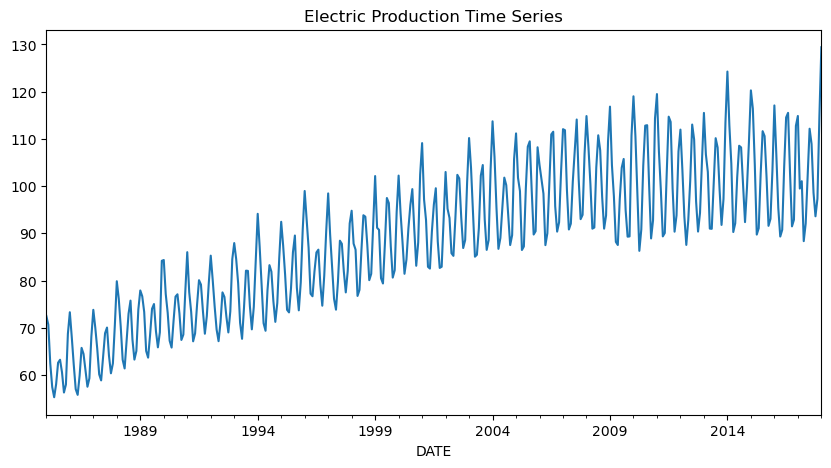

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=3.39 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=2750.050, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=2691.759, Time=0.04 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=2624.463, Time=0.05 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=2748.185, Time=0.02 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=2625.508, Time=0.07 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=2525.516, Time=0.11 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=2493.118, Time=0.12 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=2449.570, Time=0.17 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=2449.577, Time=0.14 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.42 sec
 ARIMA(1,1,4)(0,0,0)[0] intercept   : AIC=2431.710, Time=0.26 sec
 ARIMA(0,1,4)(0,0,0)[0] intercept   : AIC=2431.461, Time=0.20 sec
 ARIMA(0,1,5)(0,0,0)[0] intercept   : AIC=2359.635, Time=0.26 sec
 ARIMA(1,1,5)(0,0,0)[0] intercept   : AIC=2

C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                SARIMAX Results                                
Dep. Variable:     Electric_Production   No. Observations:                  397
Model:                  ARIMA(2, 1, 4)   Log Likelihood               -1028.613
Date:                 Tue, 15 Apr 2025   AIC                           2071.225
Time:                         11:02:20   BIC                           2099.095
Sample:                     01-01-1985   HQIC                          2082.267
                          - 01-01-2018                                         
Covariance Type:                   opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9986      0.002    522.216      0.000       0.995       1.002
ar.L2         -0.9994      0.001   -859.877      0.000      -1.002      -0.997
ma.L1         -1.3147      0.041    -32.321 

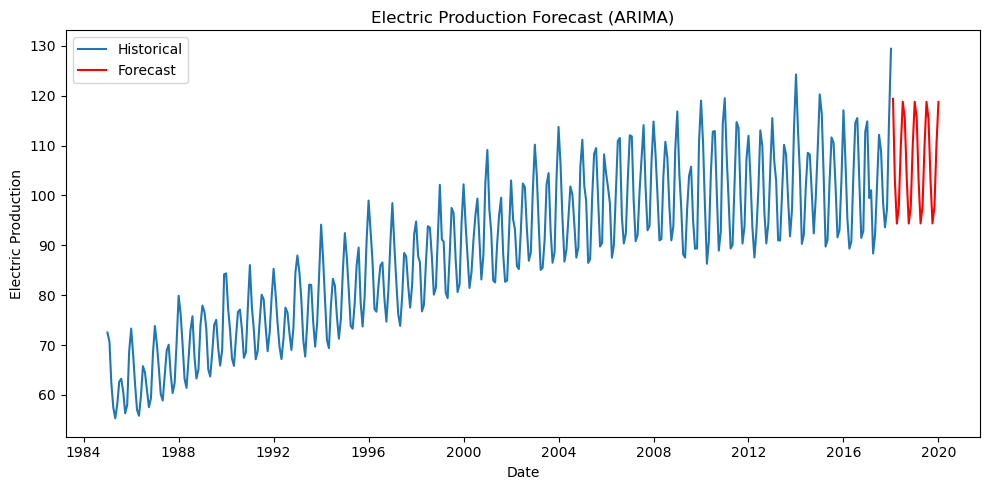

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from pmdarima import auto_arima
from datetime import datetime

# Load dataset
df = pd.read_csv(r"C:\Users\Lenovo\Downloads\Electric_Production.csv")

# Convert 'DATE' column to datetime
df['DATE'] = pd.to_datetime(df['DATE'])

# Set 'DATE' as index
df.set_index('DATE', inplace=True)

# Rename the value column
df.rename(columns={'IPG2211A2N': 'Electric_Production'}, inplace=True)

# Plot the original time series
df['Electric_Production'].plot(title='Electric Production Time Series', figsize=(10, 5))
plt.show()

# Use auto_arima to find the best order for ARIMA
stepwise_model = auto_arima(df['Electric_Production'], seasonal=False, trace=True,
                            error_action='ignore', suppress_warnings=True)

# Fit ARIMA model
model = ARIMA(df['Electric_Production'], order=stepwise_model.order)
model_fit = model.fit()

# Summary of the model
print(model_fit.summary())

# Forecast the next 24 months (2 years)
forecast_steps = 24
forecast = model_fit.forecast(steps=forecast_steps)

# Plot the forecast
plt.figure(figsize=(10, 5))
plt.plot(df['Electric_Production'], label='Historical')
plt.plot(pd.date_range(df.index[-1], periods=forecast_steps+1, freq='MS')[1:], forecast, label='Forecast', color='red')
plt.title("Electric Production Forecast (ARIMA)")
plt.xlabel("Date")
plt.ylabel("Electric Production")
plt.legend()
plt.tight_layout()
plt.show()
